In [38]:
!pip list #checking enviroment to xee if we are using sm2.0 or later

Keyring is skipped due to an exception: 'keyring.backends'
Package                              Version
------------------------------------ -----------------
aiobotocore                          2.4.0
aiohttp                              3.8.3
aioitertools                         0.11.0
aiosignal                            1.3.1
alabaster                            0.7.12
anaconda-client                      1.7.2
anaconda-project                     0.8.3
ansi2html                            1.8.0
anyio                                3.6.2
argh                                 0.26.2
argon2-cffi                          21.3.0
argon2-cffi-bindings                 21.2.0
asn1crypto                           1.3.0
astroid                              2.12.12
astropy                              4.0
async-timeout                        4.0.2
asynctest                            0.13.0
atomicwrites                         1.3.0
attrs                                22.1.0
autopep8         

In [39]:
#Importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [40]:
#reading data using pandas
fuel_economy_df=pd.read_csv('FuelEconomy.csv')

In [41]:
#view the dataframe
fuel_economy_df

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739
...,...,...
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593


In [42]:
fuel_economy_df.head

<bound method NDFrame.head of     Horse Power  Fuel Economy (MPG)
0    118.770799           29.344195
1    176.326567           24.695934
2    219.262465           23.952010
3    187.310009           23.384546
4    218.594340           23.426739
..          ...                 ...
95   162.810542           27.418661
96   266.869640           15.989945
97   243.831211           19.253375
98   140.959803           29.515593
99   184.123053           25.196097

[100 rows x 2 columns]>

In [43]:
#Seprate the data into input X and output Y
x=fuel_economy_df[['Horse Power']]
y=fuel_economy_df[['Fuel Economy (MPG)']]

In [44]:
x.shape #shape of input

(100, 1)

In [45]:
y.shape

(100, 1)

In [46]:
#Convert data into float32
X=np.array(x).astype('float32')
Y=np.array(y).astype('float32')

In [47]:
#only take numerical variable
X

array([[118.7708  ],
       [176.32657 ],
       [219.26247 ],
       [187.31001 ],
       [218.59435 ],
       [175.8381  ],
       [271.44162 ],
       [294.4259  ],
       [126.211006],
       [163.35034 ],
       [321.84076 ],
       [120.48424 ],
       [155.41537 ],
       [191.71481 ],
       [211.72911 ],
       [259.1832  ],
       [236.57173 ],
       [191.09897 ],
       [123.8857  ],
       [136.30646 ],
       [212.73895 ],
       [232.44995 ],
       [122.04016 ],
       [140.43231 ],
       [243.34784 ],
       [178.43028 ],
       [258.42422 ],
       [231.8549  ],
       [ 91.44026 ],
       [119.53666 ],
       [350.      ],
       [175.97922 ],
       [312.49222 ],
       [282.60425 ],
       [138.26474 ],
       [301.05417 ],
       [227.8735  ],
       [ 50.      ],
       [152.34785 ],
       [252.55238 ],
       [218.10709 ],
       [172.64366 ],
       [243.73724 ],
       [186.04004 ],
       [227.67047 ],
       [132.66957 ],
       [196.85954 ],
       [244.3

In [48]:
# Splitting the data and testing using sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [49]:
# Train a linear model using AWS Sagemaker
import sagemaker
import boto3 #It is AWS SDk for python.It facilates the libraries and method of python

In [50]:
# create bucket
bucket='aws.ml.engineer5' #bucket need to created forhead
prefix='linear_learner_fuel_economy' #subfolder within bucket

In [51]:
role=sagemaker.get_execution_role() #making role to access the bucket 
print(role)

arn:aws:iam::451246788348:role/service-role/AmazonSageMaker-ExecutionRole-20221121T170854


In [52]:
X_train.shape

(80, 1)

In [53]:
Y_train=Y_train[:,0]

In [54]:
Y_train.shape

(80,)

In [69]:
import io #This will allow for various I/O operation
import sagemaker.amazon.common as smac #sagemaker common library 
sagemaker_session=sagemaker.Session() #creating sagemaker session so that ml commands can be used in this


In [56]:
#COnverting the data into numpy array format to Record IO format
#this is the format required by sagemaker linear learner
buf=io.BytesIO() #create an in-memory byte array
smac.write_numpy_to_dense_tensor(buf,X_train,Y_train)
buf.seek(0)

0

In [57]:
#Code to upload RecordIO data to S3
#key refers to name of the file
key='linear-train-data'

In [58]:
# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
import os
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)
 
# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://aws.ml.engineer5/linear_learner_fuel_economy/train/linear-train-data


In [59]:
X_test.shape

(20, 1)

In [60]:
Y_test.shape


(20, 1)

In [61]:
#make sure that the target label is a vector
Y_test=Y_test[:,0]

In [62]:
buf=io.BytesIO() #create an in-memory byte array
smac.write_numpy_to_dense_tensor(buf,X_test,Y_test)
buf.seek(0)

0

In [63]:
# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
import os
key='linear-test-data'
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)
 
# Let's print out the training data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://aws.ml.engineer5/linear_learner_fuel_economy/test/linear-test-data


In [64]:
#create an output placeholder in s3 bucket to stor the linear learner object

output_location='s3://{}/{}/output'.format(bucket,prefix)
print('Training artifacts will be uploaded to:{}'.format(output_location))

Training artifacts will be uploaded to:s3://aws.ml.engineer5/linear_learner_fuel_economy/output


In [67]:
#creating sagemaker container reviewer 
container=sagemaker.image_uris.retrieve('linear-learner',boto3.Session().region_name)

In [71]:
#creating the model
linear=sagemaker.estimator.Estimator(container,role,
                                     instance_count=1,
                                     instance_type='ml.m5.xlarge',
                                     output_path=output_location,
                                     sagemaker_session=sagemaker_session)
                            

In [75]:
#hyperparameters
linear.set_hyperparameters(feature_dim=1,
                           predictor_type='regressor',
                           mini_batch_size=5,
                           epochs=5,
                           num_models=32,
                           loss='absolute_loss')
                           
                        

In [76]:
#training with training data
linear.fit({'train':s3_train_data})

2022-11-23 09:12:15 Starting - Starting the training job...
2022-11-23 09:12:38 Starting - Preparing the instances for trainingProfilerReport-1669194735: InProgress
......
2022-11-23 09:13:41 Downloading - Downloading input data...
2022-11-23 09:14:06 Training - Downloading the training image......
2022-11-23 09:15:07 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/23/2022 09:15:09 INFO 140521975678784] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias':

In [83]:
#Deploying and testing train model for inference
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer
linear_regressor=linear.deploy(initial_instance_count=1,
                               instance_type='ml.m5.xlarge',
                               serializer=CSVSerializer(),
                               deserializer=JSONDeserializer())

------!

In [85]:
result=linear_regressor.predict(X_test)
result

{'predictions': [{'score': 14.03045654296875},
  {'score': 17.150968551635742},
  {'score': 24.906272888183594},
  {'score': 25.62259292602539},
  {'score': 24.784055709838867},
  {'score': 29.262714385986328},
  {'score': 25.71267318725586},
  {'score': 24.989669799804688},
  {'score': 24.127391815185547},
  {'score': 20.373645782470703},
  {'score': 20.43868637084961},
  {'score': 15.988101959228516},
  {'score': 17.378742218017578},
  {'score': 28.246843338012695},
  {'score': 24.81554412841797},
  {'score': 26.414581298828125},
  {'score': 20.88174819946289},
  {'score': 20.874841690063477},
  {'score': 22.90399169921875},
  {'score': 30.216453552246094}]}

In [87]:
# as the data is in json format.NOw,converting into array
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([14.03045654, 17.15096855, 24.90627289, 25.62259293, 24.78405571,
       29.26271439, 25.71267319, 24.9896698 , 24.12739182, 20.37364578,
       20.43868637, 15.98810196, 17.37874222, 28.24684334, 24.81554413,
       26.4145813 , 20.8817482 , 20.87484169, 22.9039917 , 30.21645355])

In [90]:
predictions.shape

(20,)

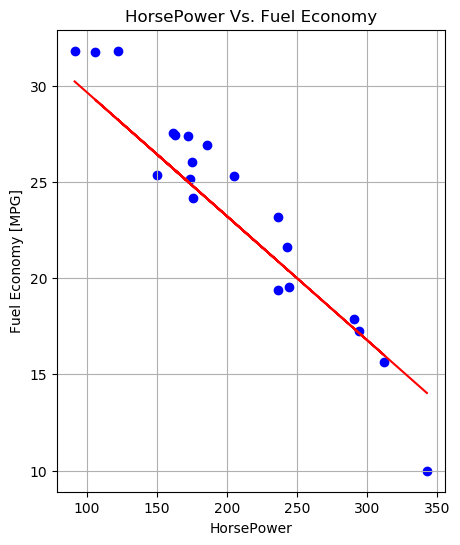

In [93]:
# VISUALIZE TEST SET RESULTS
plt.figure(figsize = (5, 6))
plt.scatter(X_test, Y_test, color = 'blue')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('HorsePower')
plt.ylabel('Fuel Economy [MPG]')
plt.title('HorsePower Vs. Fuel Economy')
plt.grid()

In [95]:
linear_regressor.delete_endpoint() #deleting the endpoint of AWS

ClientError: An error occurred (ValidationException) when calling the DescribeEndpoint operation: Could not find endpoint "arn:aws:sagemaker:us-east-1:451246788348:endpoint/linear-learner-2022-11-23-09-43-29-977".